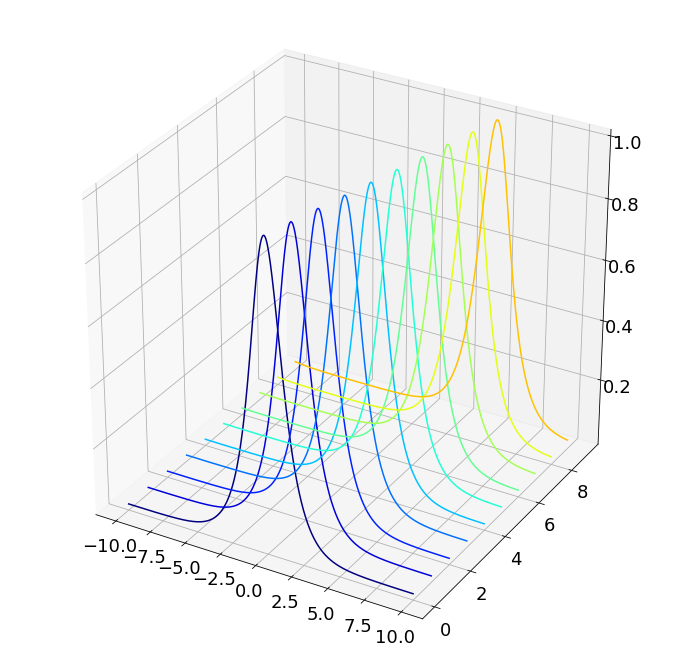

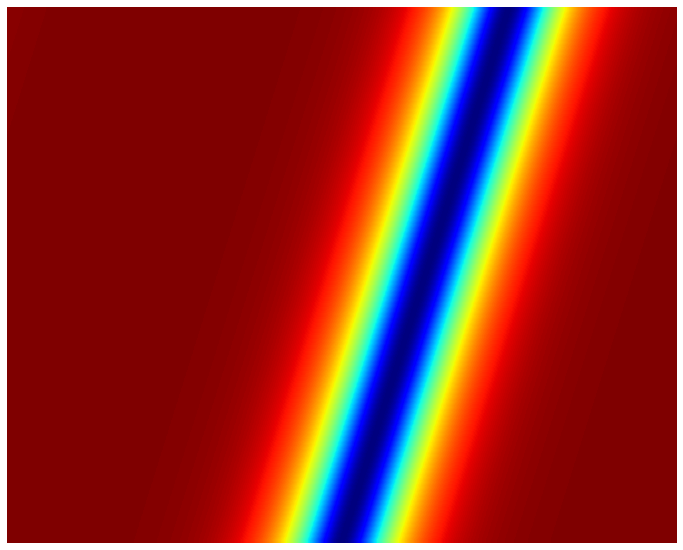

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
import matplotlib.cm as cm
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size':18})

c = 2     # Wave speed
L = 20    # Length of domain
N = 1000  # Num of discretization points
dx = L/N
x = np.arange(-L/2, L/2, dx) # Define x-domain

# Define discrete wavenumbers
kappa = 2*np.pi*np.fft.fftfreq(N, d=dx)

# Initial condition
u0 = 1/np.cosh(x)
u0hat = np.fft.fft(u0)

# Convert complex numbers to 2N-element real vector
u0hat_ri = np.concatenate((u0hat.real, u0hat.imag))

# Simulate in Fourier frequency domain
dt = 0.025
t = np.arange(0, 100*dt, dt)

def rhsWave(uhat_ri, t, kappa, c):
    uhat = uhat_ri[:N] + (1j) * uhat_ri[N:]
    d_uhat = -c*(1j) * kappa * uhat
    d_uhat_ri = np.concatenate((d_uhat.real, d_uhat.imag)).astype('float64')
    return d_uhat_ri

uhat_ri = odeint(rhsWave, u0hat_ri, t, args=(kappa, c))

uhat = uhat_ri[:, :N] + (1j) * uhat_ri[:, N:]
u = np.zeros_like(uhat)

for k in range(len(t)):
    u[k,:] = np.fft.ifft(uhat[k, :])
    
u = u.real

# Waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.set_cmap('jet_r')
u_plot = u[0:-1:10, :]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x, ys, u_plot[j,:], color=cm.jet(j*20))
    
# Also plot as an image
plt.figure()
plt.imshow(np.flipud(u), aspect=8)
plt.axis('off')
plt.set_cmap('jet_r')
plt.show()